In [5]:
import os
import numpy as np
import pymatbridge as pymat

In [6]:
matlab = pymat.Matlab()
matlab.start()


Starting MATLAB on ZMQ socket ipc:///tmp/pymatbridge-9635f0bb-5125-45cf-8cf3-2b597c393c20
Send 'exit' command to kill the server
....MATLAB started and connected!


# Problem 5.1

Generated plots, stored as pngs


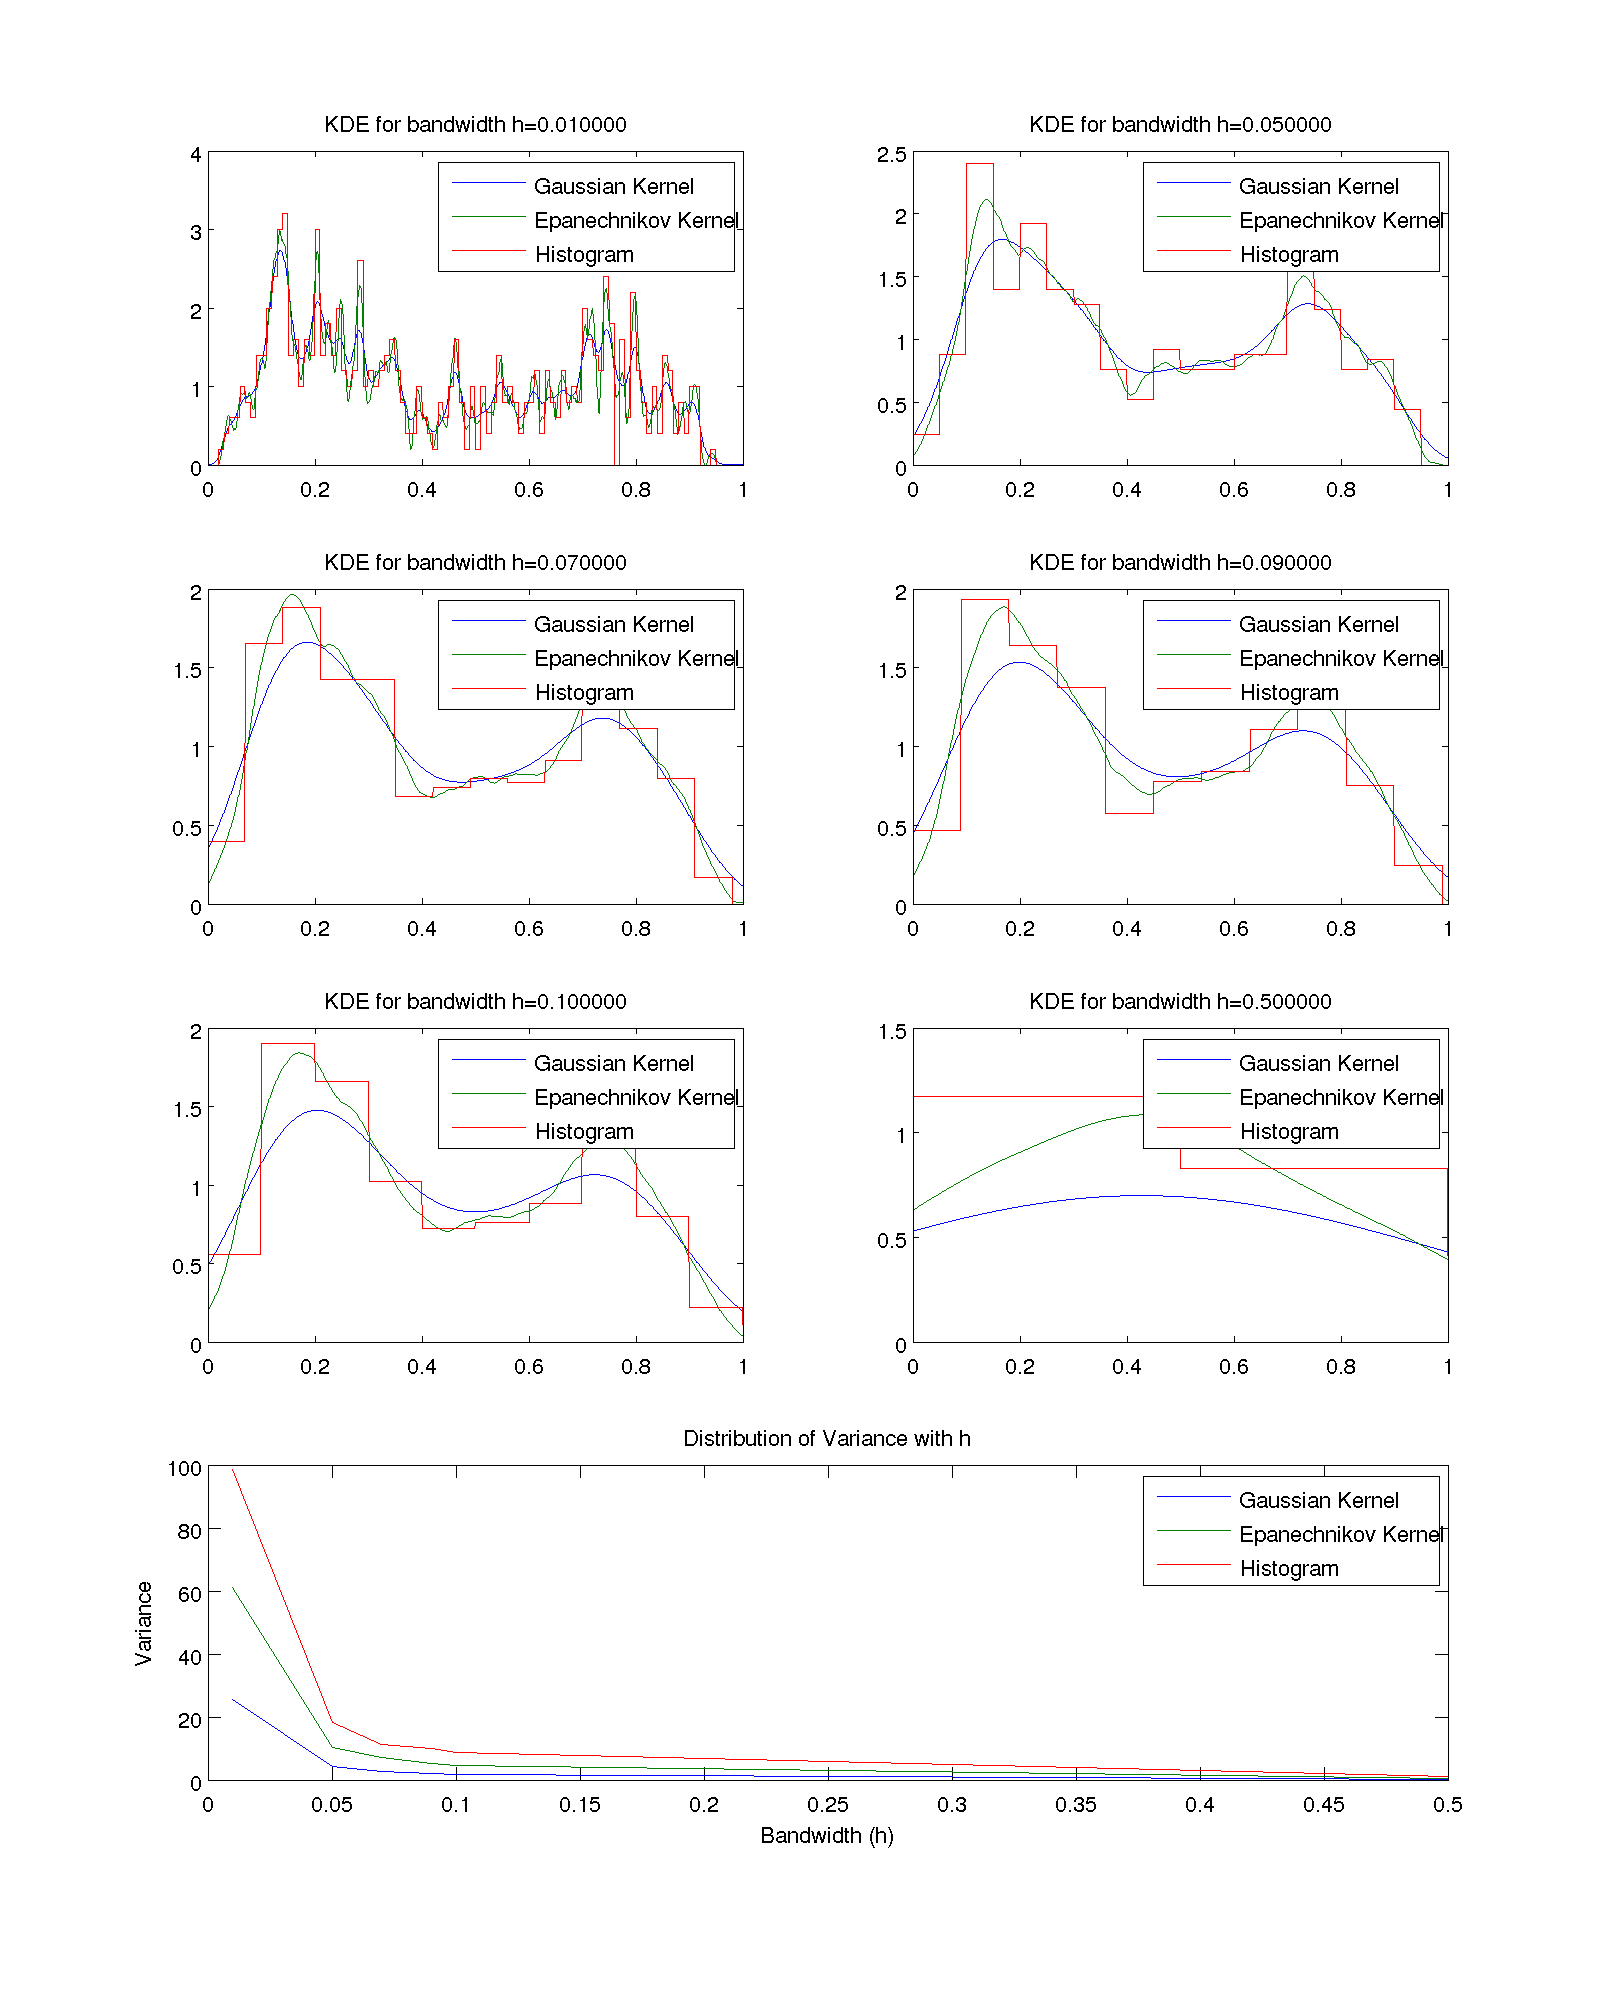

In [36]:
%%matlab --size 1600,2000

clear all;
load('hw1progde.mat');
H = [0.01,0.05,0.07,0.09,0.1,0.5];

for i=1:length(H)
    h = H(i);
    g_y = [];
    e_y= [];
    ht_y = [];    
    h_y= [];
    N_bins = ceil(1/h)+1;
    
    for j = 1:N_bins
        ht_y(end+1) = length(find( x_tr>=(j-1)*h & x_tr<(j*h) ))/(length(x_tr)*h);
    end
    
    for x = 0:0.001:1
        g_y(end+1) = problem_5_1_a(x,x_tr,h, 'gaussian');
        e_y(end+1) = problem_5_1_a(x,x_tr,h, 'epanechnikov');
        h_y(end+1) = ht_y(floor(x/h)+1);
        %h_y(end+1) = problem_5_1_a(x,x_tr,h, 'histogram');
    end
    subplot(4,2,i);
    plot(0:0.001:1,g_y,0:0.001:1,e_y, 0:0.001:1, h_y);
    legend('Gaussian Kernel','Epanechnikov Kernel', 'Histogram');
    tl = sprintf('KDE for bandwidth h=%f',h);
    title(tl);
    print(tl, '-dpng');
    
    %%%%%%%%%%% Shuffle data
    
end
test_data_size = size(x_te,1);
ix = randperm(test_data_size);
x_te_shuffled = x_te(ix);
N_split = 19;
list_size = test_data_size/N_split;
list_of_shuffled_te = [];
for i=1:N_split
    list_of_shuffled_te(end+1,:) = x_te_shuffled(list_size*(i-1)+1 : list_size*i,:);
end

var_g = [];
var_e= [];
var_h = [];


for i=1:length(H)
    h = H(i);
    x_points = linspace(0, 1, 50);
    all_fh_g = [];
    all_fh_e = [];
    all_fh_h = [];
    g_y = [];
    e_y= [];
    ht_y = [];    
    h_y= [];
    N_bins = ceil(1/h)+1;
    
    
    for i=1:N_split
        data = list_of_shuffled_te(i);    
        g_y = [];
        e_y= [];     
        h_y= [];
        ht_y = [];
        for t = 1:N_bins
            ht_y(end+1) = length(find( data>=(t-1)*h & data<(t*h) ))/(length(data)*h);
        end
    
        for j=1:length(x_points)
            x=x_points(j);
            g_y(end+1) = problem_5_1_a(x,data,h, 'gaussian');
            e_y(end+1) = problem_5_1_a(x,data,h, 'epanechnikov');
            h_y(end+1) = ht_y(floor(x/h)+1);            
        end
        all_fh_g(end+1,:) = g_y;
        all_fh_e(end+1,:) = e_y;
        all_fh_h(end+1,:) = h_y;
    end

    f_h_g = mean(all_fh_g);
    f_h_e = mean(all_fh_e);
    f_h_h = mean(all_fh_h);
    

    s_g = 0;
    for i=1:N_split
        s_g = s_g+sum((all_fh_g(i,:)-f_h_g).^2);
    end
    
    s_e = 0;
    for i=1:N_split
        s_e = s_e+sum((all_fh_e(i,:)-f_h_e).^2);
    end
    
    s_h = 0;
    for i=1:N_split
        s_h = s_h+sum((all_fh_h(i,:)-f_h_h).^2);
    end

    
    s_g=s_g/(N_split*length(x_points));
    s_e=s_e/(N_split*length(x_points));
    s_h=s_h/(N_split*length(x_points));
    var_g(end+1)=s_g;
    var_e(end+1)=s_e;
    var_h(end+1)=s_h;
end

subplot(4,2,7:8)
plot(H,var_g,H,var_e,H,var_h);

disp('Generated plots, stored as pngs');
legend('Gaussian Kernel','Epanechnikov Kernel', 'Histogram');
title('Distribution of Variance with h')
xlabel('Bandwidth (h)')
ylabel('Variance')
